In [1262]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

In [1263]:
trait_a = pd.read_csv("C:\\Users\\paulo\\Documents\\RA and Fellowship Applications\\Data_Tests\\NBER Genoeconomics\\data\\sumstats_trait_A.txt", sep="\t")
trait_b = pd.read_csv("C:\\Users\\paulo\\Documents\\RA and Fellowship Applications\\Data_Tests\\NBER Genoeconomics\\data\\sumstats_trait_B.txt", sep="\t")

In [1264]:
trait_a.head()

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
0,rs9616607,22,49788151.0,G,A,0.39900,79058.000000,-0.003429,-0.651574,801968,0.993311
1,rs185993830,22,32456806.0,G,C,0.00334,79075.976458,-0.055146,-1.018706,809532,0.939896
2,rs10427946,22,49635321.0,A,C,0.07469,79270.000000,-0.011159,-1.077497,801720,0.977853
3,rs9608094,22,23618043.0,T,C,0.22970,79568.000000,0.013672,2.260027,806672,0.995914
4,rs7290684,22,29857664.0,T,C,0.19050,79499.000000,-0.004578,-0.710282,809550,0.997486


In [1265]:
trait_b.head()

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
0,rs9616607,22,49788151.0,G,A,0.39900,79749.00000,-0.005646,-1.050340,801968,0.993311
1,rs185993830,22,32456806.0,G,C,0.00334,78758.14888,-0.011284,-0.175459,809532,0.939896
2,rs10427946,22,49635321.0,A,C,0.07469,77812.00000,-0.009823,-0.871380,801720,0.977853
3,rs9608094,22,23618043.0,T,C,0.22970,79774.00000,-0.008138,-1.325863,806672,0.995914
4,rs7290684,22,29857664.0,T,C,0.19050,79473.00000,0.002182,0.335213,809550,0.997486


In [1266]:
[len(trait_a),len(trait_b)]

[10000, 10000]

Question 1

In [1267]:
# Trait A
trait_a.isna().sum()

SNP           0
CHR           0
BPOS        701
A1            0
A2            0
MAF           0
N             0
beta_hat    345
z           345
NCHROBS       0
info        345
dtype: int64

In [1268]:
# There seems to be no obvious relationship between the SNP value and the CHR-BPOS value, so I do not see how I would be able to recreate the BPOS value for where it is null.
trait_a[trait_a['BPOS'].notnull()]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,0.993311
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,0.939896
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,0.977853
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,0.995914
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,0.997486
...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,0.954351
9996,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,0.995666
9997,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,0.719094
9998,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,0.993643


In [1269]:
# There should only be one row per SNP, but this is not the case
trait_a.groupby('SNP').count().query('CHR > 1')

,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
SNP,,,,,,,,,,
rs1015183,2,2,2,2,2,2,2,2,2,2
rs10448585,2,1,2,2,2,2,2,2,2,2
rs111705218,2,2,2,2,2,2,2,2,2,2
rs111736209,2,2,2,2,2,2,2,2,2,2
rs112908356,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
rs79799625,2,2,2,2,2,2,2,2,2,2
rs9612351,2,2,2,2,2,2,2,2,2,2
rs9615811,2,2,2,2,2,2,2,2,2,2


In [1270]:
trait_a[trait_a['SNP'] == 'rs10448585']

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
467,rs10448585,22,NaN,C,T,0.236600,77749.000000,-0.011502,-1.496084,714534,0.928956
7049,rs10448585,22,23548204.0,A,G,0.001035,78865.409013,-0.083435,-0.480422,807772,0.762156


In [1271]:
trait_a[trait_a['SNP'] == 'rs1015183']

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
1313,rs1015183,22,49065765.0,C,T,0.3560,77933.0,-0.021424,-3.819650,785212,0.983831
9335,rs1015183,22,22713585.0,C,G,0.2363,76909.0,0.005898,0.956458,803378,0.992518


In [1272]:
trait_a[trait_a['SNP'] == 'rs79799625']

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
2480,rs79799625,22,28638511.0,G,C,0.37500,79780.0,0.002564,0.491621,807578,0.997639
3808,rs79799625,22,43866677.0,T,G,-0.01335,78691.0,0.028222,1.160777,808456,0.971997


In [1273]:
trait_a[trait_a['SNP'] == 'rs9623066']

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
2165,rs9623066,22,25176512.0,G,T,0.3475,73635.0,-0.008890,-1.602026,804468,0.996054
5340,rs9623066,22,22554754.0,C,T,0.4881,79653.0,0.004111,0.816300,809852,0.998731


In [1274]:
# The 'duplicate' rows have totally different values, which is concerning
# But the CHR-BPOS combos seem to be unique even for SNP duplicates, suggesting that the SNP column is where the error is
# I make a new column that is the BPOS value (if not null), and the SNP one elsewise. We can use just the BPOS value since every row has CHR=22.
trait_a['unique_identifier'] = 0
trait_a.loc[trait_a['BPOS'].isna(),'unique_identifier'] = trait_a.loc[trait_a['BPOS'].isna(),'SNP']
trait_a.loc[trait_a['BPOS'].notnull(),'unique_identifier'] = trait_a.loc[trait_a['BPOS'].notnull(),'BPOS']
trait_a

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07
9996,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07
9997,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07
9998,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07


In [1275]:
trait_a.isna().sum()

SNP                    0
CHR                    0
BPOS                 701
A1                     0
A2                     0
MAF                    0
N                      0
beta_hat             345
z                    345
NCHROBS                0
info                 345
unique_identifier      0
dtype: int64

In [1276]:
trait_a.groupby('unique_identifier').count().query('CHR > 1')
# We know have only one duplicate value.

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
unique_identifier,,,,,,,,,,,
39587976.0,2,2,2,2,2,2,2,2,2,2,2


In [1277]:
trait_a[trait_a['unique_identifier'] == 39587976.0]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
6002,rs77578988,22,39587976.0,C,A,0.1241,79704.0,0.003262,0.416878,805752,0.991961,3.9588e+07
8222,rs77578988,22,39587976.0,C,A,0.1241,79474.0,-0.039445,-0.860754,805752,0.348205,3.9588e+07


In [1278]:
# It is hard to tell which one is correct here, so I drop both
trait_a = trait_a.drop_duplicates(subset = 'unique_identifier', keep = False)

In [1279]:
trait_a.groupby('unique_identifier').count().query('CHR > 1')
# We now have no duplicate values.

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
unique_identifier,,,,,,,,,,,


In [1280]:
trait_a[trait_a['MAF'] < 0]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
81,rs577723029,22,NaN,T,C,-0.998411,79713.529729,NaN,NaN,805426,NaN,rs577723029
246,rs111331764,22,34975213.0,A,G,-0.098640,79330.000000,-0.006677,-0.782982,808906,0.996504,3.49752e+07
335,rs147062091,22,35856338.0,T,C,-0.009944,77236.092108,-0.021478,-0.631198,805450,0.920257,3.58563e+07
376,rs8142479,22,31573151.0,G,A,-0.002720,76601.446926,0.079836,1.380353,810170,0.953840,3.15732e+07
420,rs57526188,22,32795626.0,C,T,-0.003078,78866.782738,-0.044459,-0.867741,810316,0.967005,3.27956e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9669,rs16992605,22,45045207.0,G,A,-0.004040,79880.693068,-0.060870,-1.206227,808822,0.931814,4.50452e+07
9766,rs2097377,22,49574828.0,C,T,-0.304800,79977.000000,0.006694,1.211442,806204,0.995330,4.95748e+07
9808,rs2215841,22,17303464.0,C,A,-0.418900,79093.000000,-0.003453,-0.672550,808530,0.997928,1.73035e+07
9814,rs138063,22,44225846.0,G,T,-0.208800,79968.000000,0.010537,1.710551,810756,0.999654,4.42258e+07


In [1281]:
# I assume that this is a data error and all these values should be the opposite of what they are.
trait_a.loc[trait_a['MAF'] < 0,'MAF'] = - trait_a.loc[trait_a['MAF'] < 0,'MAF']
trait_a

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07
9996,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07
9997,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07
9998,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07


In [1282]:
trait_a.loc[81]
# Check that was done correctly. It was.

SNP                  rs577723029
CHR                           22
BPOS                         NaN
A1                             T
A2                             C
MAF                     0.998411
N                        79713.5
beta_hat                     NaN
z                            NaN
NCHROBS                   805426
info                         NaN
unique_identifier    rs577723029
Name: 81, dtype: object

In [1283]:
trait_a[trait_a['MAF'] < 0]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier


In [1284]:
trait_a[trait_a['MAF'] > 1]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
88,rs190550669,22,25465005.0,A,G,1.002546,79860.274053,-0.064812,-0.956093,809022,0.913302,2.5465e+07
218,rs132891,22,45570594.0,C,T,1.315300,79830.000000,-0.004318,-0.792992,806814,0.997026,4.55706e+07
288,rs12159087,22,47575929.0,T,C,1.002333,79250.713725,0.130297,1.059495,802348,0.741174,4.75759e+07
339,rs189198280,22,18444492.0,T,A,1.013940,78672.000000,0.037172,1.652513,809768,0.987610,1.84445e+07
400,rs735750,22,24187123.0,G,A,1.343600,79281.000000,0.004422,0.756921,772262,0.972612,2.41871e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9334,rs6008780,22,46769872.0,C,A,1.009336,78495.536040,-0.061691,-2.054330,808600,0.962737,4.67699e+07
9434,rs74854653,22,42452785.0,T,C,1.002060,75562.385774,0.081231,1.288413,810756,0.970351,4.24528e+07
9645,rs76494231,22,48326332.0,T,G,1.003735,79378.021200,0.002727,0.056253,809812,0.954826,4.83263e+07
9849,rs1107132,22,47302350.0,T,C,1.260400,78849.000000,-0.022948,-3.988957,810050,0.999292,4.73024e+07


In [1285]:
# I assume that this is an entry error and subtract 1 from every MAF
trait_a.loc[trait_a['MAF'] > 1,'MAF'] = trait_a.loc[trait_a['MAF'] > 1,'MAF'] - 1
trait_a

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07
9996,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07
9997,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07
9998,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07


In [1286]:
trait_a[trait_a['MAF'] > 0.5]

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
14,rs59603238,22,47307416.0,C,T,0.967340,79529.000000,-0.008470,-0.595145,810544,0.997581,4.73074e+07
15,rs910542,22,47556343.0,A,C,0.611800,77032.000000,-0.003285,-0.628390,811038,1.000000,4.75563e+07
19,rs62232718,22,47340819.0,G,AT,0.915410,77368.000000,-0.002635,-0.275202,804164,0.986977,4.73408e+07
24,rs11913697,22,50321918.0,A,G,0.995892,79048.987315,0.033235,0.484936,804116,0.840029,5.03219e+07
28,rs73179018,22,43421472.0,G,A,0.869000,79816.000000,0.003821,0.515050,811038,1.000000,4.34215e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9977,rs135746,22,38684067.0,C,T,0.862800,78780.000000,0.007056,0.824192,775316,0.956792,3.86841e+07
9979,rs5754818,22,34464710.0,G,A,0.584200,79900.000000,0.008147,1.580594,803708,0.995792,3.44647e+07
9985,rs147113374,22,22896430.0,T,C,0.996787,79828.171978,0.028470,0.354532,805464,0.827967,2.28964e+07
9991,rs9608876,22,30717916.0,C,T,0.978250,77381.000000,-0.009167,-0.524567,810918,0.999216,3.07179e+07


In [1287]:
# So some rows have minor allele frequencies above 50%, which violates the definition of a "minor allele" that it be less common than a major one.
# I assume that the columns for A1 and A2 should be swapped
x = trait_a.copy()
trait_a.loc[x['MAF'] > 0.5,'A1'] = x.loc[x['MAF'] > 0.5,'A2']
trait_a.loc[x['MAF'] > 0.5,'A2'] = x.loc[x['MAF'] > 0.5,'A1']
trait_a.loc[x['MAF'] > 0.5,'MAF'] = 1 - x.loc[x['MAF'] > 0.5,'MAF']
trait_a

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07
9996,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07
9997,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07
9998,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07


In [1288]:
# Checking to make sure this was done correctly. It was.
trait_a.loc[14]

SNP                   rs59603238
CHR                           22
BPOS                 4.73074e+07
A1                             T
A2                             C
MAF                      0.03266
N                          79529
beta_hat             -0.00847028
z                      -0.595145
NCHROBS                   810544
info                    0.997581
unique_identifier    4.73074e+07
Name: 14, dtype: object

In [1289]:
trait_a[trait_a['MAF'] > 0.5]
# Last check

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier


In [1290]:
trait_a['N'].describe()
# No highly implausible values here.

count     9998.000000
mean     78683.914018
std       1758.119737
min      49960.000000
25%      78362.000000
50%      79251.572401
75%      79701.000000
max      79999.686492
Name: N, dtype: float64

In [1291]:
trait_a['beta_hat'].describe()
# No highly implausible values here either.

count    9653.000000
mean       -0.000332
std         0.050896
min        -0.535123
25%        -0.011572
50%         0.000151
75%         0.011260
max         0.695427
Name: beta_hat, dtype: float64

In [1292]:
trait_a['z'].describe()
# Nothing concerning here either. I don't see how we would have the data needed to double-check these numbers (we would need the individual observations)

count    9653.000000
mean       -0.001691
std         1.341820
min        -5.150718
25%        -0.889473
50%         0.012105
75%         0.899003
max         5.758008
Name: z, dtype: float64

In [1293]:
trait_a['info'].describe()
# There are some values above 1, which is against the definition of the variable. I will deal with this once datasets are merged.

count    9653.000000
mean        0.956657
std         0.066169
min         0.321743
25%         0.941180
50%         0.987331
75%         0.996867
max         1.179798
Name: info, dtype: float64

I know make all of those changes for trait_b as well.

In [1294]:
trait_b['CHR'].unique()

array([22], dtype=int64)

In [1295]:
trait_b.isna().sum()
trait_b.groupby('SNP').count().query('CHR > 1')

,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
SNP,,,,,,,,,,
rs1003619,2,2,2,2,2,2,2,2,2,2
rs10854521,2,2,2,2,2,2,2,2,2,2
rs111299797,2,2,2,2,2,2,2,2,2,2
rs111646688,2,1,2,2,2,2,1,1,2,1
rs111659187,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
rs916243,2,2,2,2,2,2,2,2,2,2
rs9605253,2,2,2,2,2,2,2,2,2,2
rs9613260,2,2,2,2,2,2,2,2,2,2


In [1296]:
trait_b['unique_identifier'] = 0
trait_b.loc[trait_b['BPOS'].isna(),'unique_identifier'] = trait_b.loc[trait_b['BPOS'].isna(),'SNP']
trait_b.loc[trait_b['BPOS'].notnull(),'unique_identifier'] = trait_b.loc[trait_b['BPOS'].notnull(),'BPOS']
trait_b

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
0,rs9616607,22,49788151.0,G,A,0.399000,79749.000000,-0.005646,-1.050340,801968,0.993311,4.97882e+07
1,rs185993830,22,32456806.0,G,C,0.003340,78758.148880,-0.011284,-0.175459,809532,0.939896,3.24568e+07
2,rs10427946,22,49635321.0,A,C,0.074690,77812.000000,-0.009823,-0.871380,801720,0.977853,4.96353e+07
3,rs9608094,22,23618043.0,T,C,0.229700,79774.000000,-0.008138,-1.325863,806672,0.995914,2.3618e+07
4,rs7290684,22,29857664.0,T,C,0.190500,79473.000000,0.002182,0.335213,809550,0.997486,2.98577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rs148138077,22,20208291.0,A,G,0.011210,79403.999399,0.039549,1.222512,807212,0.954351,2.02083e+07
9996,rs5747139,22,17920248.0,C,T,0.363100,79665.000000,-0.003611,-0.670873,804052,0.995666,1.79202e+07
9997,rs111699182,22,51174012.0,T,C,0.002807,79692.652024,-0.101663,-0.610078,798942,0.719094,5.1174e+07
9998,rs5749889,22,34988560.0,T,A,0.088090,76198.000000,-0.002526,-0.266762,808116,0.993643,3.49886e+07


In [1297]:
trait_b.groupby('unique_identifier').count().query('CHR > 1')
# We know have only have two duplicate values.

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info
unique_identifier,,,,,,,,,,,
39587976.0,2,2,2,2,2,2,2,2,2,2,2
rs4560224,2,2,0,2,2,2,2,2,2,2,2


In [1298]:
# It is hard to tell which one is correct here, so I drop both
trait_b = trait_b.drop_duplicates(subset = 'unique_identifier', keep = False)

In [1299]:
trait_b.loc[trait_b['MAF'] < 0,'MAF'] = - trait_b.loc[trait_b['MAF'] < 0,'MAF']
trait_b[trait_b['MAF'] < 0]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier


In [1300]:
trait_b.loc[trait_b['MAF'] > 1,'MAF'] = trait_b.loc[trait_b['MAF'] > 1,'MAF'] - 1
trait_b[trait_b['MAF'] > 1]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier


In [1301]:
x = trait_b.copy()
trait_b.loc[x['MAF'] > 0.5,'A1'] = x.loc[x['MAF'] > 0.5,'A2']
trait_b.loc[x['MAF'] > 0.5,'A2'] = x.loc[x['MAF'] > 0.5,'A1']
trait_b.loc[x['MAF'] > 0.5,'MAF'] = 1 - x.loc[x['MAF'] > 0.5,'MAF']
trait_b[trait_b['MAF'] > 0.5]

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier


In [1302]:
trait_b['N'].describe()
# No highly implausible values here.

count     9996.000000
mean     78632.802970
std       1941.381796
min      40856.000000
25%      78307.970454
50%      79229.500000
75%      79696.000000
max      79999.765458
Name: N, dtype: float64

In [1303]:
trait_b['beta_hat'].describe()
# No highly implausible values here.

count    9651.000000
mean        0.000031
std         0.062510
min        -0.786213
25%        -0.009216
50%        -0.000061
75%         0.009452
max         1.096324
Name: beta_hat, dtype: float64

In [1304]:
trait_b['z'].describe()

count    9651.000000
mean        0.009392
std         1.297791
min       -15.116117
25%        -0.714349
50%        -0.006161
75%         0.717652
max        13.896054
Name: z, dtype: float64

In [1305]:
trait_b[trait_b['z'].abs() > 5]
# Some of the z-scores seem suspiciously extreme, however I do not know how we would be able to tell that they are actually incorrect.

,SNP,CHR,BPOS,A1,A2,MAF,N,beta_hat,z,NCHROBS,info,unique_identifier
246,rs111331764,22,34975213.0,A,G,0.098640,76802.000000,0.046422,5.286450,808906,0.996504,3.49752e+07
301,rs5770277,22,49338946.0,T,C,0.449900,76918.000000,0.059295,11.514857,810158,0.999362,4.93389e+07
351,rs5996976,22,26185636.0,C,T,0.019240,79446.000000,-0.132248,-7.123543,810878,0.997829,2.61856e+07
490,rs189440787,22,24038070.0,G,A,0.007065,77447.908068,0.313145,5.032229,801868,0.870630,2.40381e+07
535,rs390702,22,18288571.0,T,C,0.371900,77365.000000,-0.028948,-5.436848,809170,0.998373,1.82886e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
9503,rs5995495,22,38159316.0,G,C,0.034610,78441.000000,0.091403,6.490437,810392,0.997414,3.81593e+07
9529,rs150022934,22,51121700.0,C,C,0.008534,78993.060725,0.363515,7.956997,806276,0.916100,5.11217e+07
9665,rs130312,22,44466687.0,G,A,0.437000,79166.000000,-0.034989,-6.312694,790798,0.987729,4.44667e+07
9722,rs113730250,22,35889984.0,A,G,0.008367,77896.617504,0.453910,7.769134,801744,0.865368,3.589e+07


Last check of Individual datasets

In [1306]:
trait_a.describe()

,CHR,BPOS,MAF,N,beta_hat,z,NCHROBS,info
count,9998.0,9.297000e+03,9998.000000,9998.000000,9653.000000,9653.000000,9998.000000,9653.000000
mean,22.0,3.519601e+07,0.125377,78683.914018,-0.000332,-0.001691,801533.206241,0.956657
std,0.0,1.006603e+07,0.147783,1758.119737,0.050896,1.341820,29760.044961,0.066169
min,22.0,1.656829e+07,0.000966,49960.000000,-0.535123,-5.150718,60242.000000,0.321743
25%,22.0,2.663446e+07,0.006761,78362.000000,-0.011572,-0.889473,803130.500000,0.941180
50%,22.0,3.512489e+07,0.052175,79251.572401,0.000151,0.012105,807741.000000,0.987331
75%,22.0,4.467400e+07,0.216575,79701.000000,0.011260,0.899003,809966.000000,0.996867
max,22.0,5.121103e+07,0.500000,79999.686492,0.695427,5.758008,811038.000000,1.179798


In [1307]:
trait_b.describe()

,CHR,BPOS,MAF,N,beta_hat,z,NCHROBS,info
count,9996.0,9.297000e+03,9996.000000,9996.000000,9651.000000,9651.000000,9996.000000,9651.000000
mean,22.0,3.519601e+07,0.125357,78632.802970,0.000031,0.009392,801611.913165,0.956685
std,0.0,1.006603e+07,0.147786,1941.381796,0.062510,1.297791,29006.716835,0.066019
min,22.0,1.656829e+07,0.000966,40856.000000,-0.786213,-15.116117,60242.000000,0.321743
25%,22.0,2.663446e+07,0.006759,78307.970454,-0.009216,-0.714349,803136.500000,0.941024
50%,22.0,3.512489e+07,0.052110,79229.500000,-0.000061,-0.006161,807744.000000,0.987315
75%,22.0,4.467400e+07,0.216525,79696.000000,0.009452,0.717652,809966.000000,0.996868
max,22.0,5.121103e+07,0.500000,79999.765458,1.096324,13.896054,811038.000000,1.313703


In [1308]:
# All numerical values (except info) are in their correct range.

I now merge the two datasets:

In [1309]:
trait_a.merge(trait_b,on = "unique_identifier",how="inner")

,SNP_x,CHR_x,BPOS_x,A1_x,A2_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,...,CHR_y,BPOS_y,A1_y,A2_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,...,22,49788151.0,G,A,0.399000,79749.000000,-0.005646,-1.050340,801968,0.993311
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,...,22,32456806.0,G,C,0.003340,78758.148880,-0.011284,-0.175459,809532,0.939896
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,...,22,49635321.0,A,C,0.074690,77812.000000,-0.009823,-0.871380,801720,0.977853
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,...,22,23618043.0,T,C,0.229700,79774.000000,-0.008138,-1.325863,806672,0.995914
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,...,22,29857664.0,T,C,0.190500,79473.000000,0.002182,0.335213,809550,0.997486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,...,22,20208291.0,A,G,0.011210,79403.999399,0.039549,1.222512,807212,0.954351
9976,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,...,22,17920248.0,C,T,0.363100,79665.000000,-0.003611,-0.670873,804052,0.995666
9977,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,...,22,51174012.0,T,C,0.002807,79692.652024,-0.101663,-0.610078,798942,0.719094
9978,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,...,22,34988560.0,T,A,0.088090,76198.000000,-0.002526,-0.266762,808116,0.993643


In [1310]:
z = trait_a.merge(trait_b,on = "unique_identifier",how="outer")

In [1311]:
len(z[z['SNP_x'].isna()][['SNP_x','CHR_x','BPOS_x','unique_identifier','SNP_y','CHR_y','BPOS_y']])

16

In [1312]:
len(z[z['SNP_y'].isna()][['SNP_x','CHR_x','BPOS_x','unique_identifier','SNP_y','CHR_y','BPOS_y']])
# There was no cross-joining, which is good. There were 9998 in trait_a, and 9996 in trait_b. 9980 were joined together, and then 18 from trait_a and 16 from trait_b that couldn't find a match.

18

In [1313]:
z[z['SNP_x'].isna()][['SNP_x','CHR_x','BPOS_x','unique_identifier','SNP_y','CHR_y','BPOS_y']].sort_values('SNP_y')

,SNP_x,CHR_x,BPOS_x,unique_identifier,SNP_y,CHR_y,BPOS_y
10001,NaN,NaN,NaN,rs111646688,rs111646688,22.0,NaN
10008,NaN,NaN,NaN,rs113886494,rs113886494,22.0,NaN
10012,NaN,NaN,NaN,rs11703743,rs11703743,22.0,NaN
9998,NaN,NaN,NaN,rs13055757,rs13055757,22.0,NaN
9999,NaN,NaN,NaN,rs2003748,rs2003748,22.0,NaN
10011,NaN,NaN,NaN,rs2071892,rs2071892,22.0,NaN
10004,NaN,NaN,NaN,rs2267025,rs2267025,22.0,NaN
10003,NaN,NaN,NaN,rs4822322,rs4822322,22.0,NaN
10010,NaN,NaN,NaN,rs4823355,rs4823355,22.0,NaN
10000,NaN,NaN,NaN,rs548685061,rs548685061,22.0,NaN


In [1314]:
z[z['SNP_y'].isna()][['SNP_x','CHR_x','BPOS_x','unique_identifier','SNP_y','CHR_y','BPOS_y']].sort_values('SNP_x')

,SNP_x,CHR_x,BPOS_x,unique_identifier,SNP_y,CHR_y,BPOS_y
2130,rs115054066,22.0,NaN,rs115054066,NaN,NaN,NaN
6935,rs13057638,22.0,NaN,rs13057638,NaN,NaN,NaN
4296,rs148491942,22.0,NaN,rs148491942,NaN,NaN,NaN
9142,rs4560224,22.0,NaN,rs4560224,NaN,NaN,NaN
52,rs530689565,22.0,NaN,rs530689565,NaN,NaN,NaN
6114,rs531867169,22.0,NaN,rs531867169,NaN,NaN,NaN
8313,rs554828636,22.0,NaN,rs554828636,NaN,NaN,NaN
3758,rs56043219,22.0,NaN,rs56043219,NaN,NaN,NaN
4901,rs561734808,22.0,NaN,rs561734808,NaN,NaN,NaN
666,rs563134354,22.0,NaN,rs563134354,NaN,NaN,NaN


In [1315]:
# There don't seem any matches between these two sets of values that were not combined in the inner join. Therefore, we just use the inner merge on the unique identifier:
traits = trait_a.merge(trait_b,on = "unique_identifier",how="inner")
traits

,SNP_x,CHR_x,BPOS_x,A1_x,A2_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,...,CHR_y,BPOS_y,A1_y,A2_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,...,22,49788151.0,G,A,0.399000,79749.000000,-0.005646,-1.050340,801968,0.993311
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,...,22,32456806.0,G,C,0.003340,78758.148880,-0.011284,-0.175459,809532,0.939896
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,...,22,49635321.0,A,C,0.074690,77812.000000,-0.009823,-0.871380,801720,0.977853
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,...,22,23618043.0,T,C,0.229700,79774.000000,-0.008138,-1.325863,806672,0.995914
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,...,22,29857664.0,T,C,0.190500,79473.000000,0.002182,0.335213,809550,0.997486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,...,22,20208291.0,A,G,0.011210,79403.999399,0.039549,1.222512,807212,0.954351
9976,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,...,22,17920248.0,C,T,0.363100,79665.000000,-0.003611,-0.670873,804052,0.995666
9977,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,...,22,51174012.0,T,C,0.002807,79692.652024,-0.101663,-0.610078,798942,0.719094
9978,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,...,22,34988560.0,T,A,0.088090,76198.000000,-0.002526,-0.266762,808116,0.993643


In [1316]:
# Correcting A1 and A2 labels
traits['A1'] = traits['A1_x']
traits['A2'] = traits['A2_x']
traits

,SNP_x,CHR_x,BPOS_x,A1_x,A2_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,...,A1_y,A2_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,...,G,A,0.399000,79749.000000,-0.005646,-1.050340,801968,0.993311,G,A
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,...,G,C,0.003340,78758.148880,-0.011284,-0.175459,809532,0.939896,G,C
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,...,A,C,0.074690,77812.000000,-0.009823,-0.871380,801720,0.977853,A,C
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,...,T,C,0.229700,79774.000000,-0.008138,-1.325863,806672,0.995914,T,C
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,...,T,C,0.190500,79473.000000,0.002182,0.335213,809550,0.997486,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,rs148138077,22,20208291.0,G,G,0.011210,79634.955404,0.005678,0.202102,807212,...,A,G,0.011210,79403.999399,0.039549,1.222512,807212,0.954351,G,G
9976,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,...,C,T,0.363100,79665.000000,-0.003611,-0.670873,804052,0.995666,C,T
9977,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,...,T,C,0.002807,79692.652024,-0.101663,-0.610078,798942,0.719094,T,C
9978,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,...,T,A,0.088090,76198.000000,-0.002526,-0.266762,808116,0.993643,T,A


In [1317]:
traits[traits['A1_x'] == traits['A1_y'] ]

,SNP_x,CHR_x,BPOS_x,A1_x,A2_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,...,A1_y,A2_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2
0,rs9616607,22,49788151.0,G,A,0.399000,79058.000000,-0.003429,-0.651574,801968,...,G,A,0.399000,79749.000000,-0.005646,-1.050340,801968,0.993311,G,A
1,rs185993830,22,32456806.0,G,C,0.003340,79075.976458,-0.055146,-1.018706,809532,...,G,C,0.003340,78758.148880,-0.011284,-0.175459,809532,0.939896,G,C
2,rs10427946,22,49635321.0,A,C,0.074690,79270.000000,-0.011159,-1.077497,801720,...,A,C,0.074690,77812.000000,-0.009823,-0.871380,801720,0.977853,A,C
3,rs9608094,22,23618043.0,T,C,0.229700,79568.000000,0.013672,2.260027,806672,...,T,C,0.229700,79774.000000,-0.008138,-1.325863,806672,0.995914,T,C
4,rs7290684,22,29857664.0,T,C,0.190500,79499.000000,-0.004578,-0.710282,809550,...,T,C,0.190500,79473.000000,0.002182,0.335213,809550,0.997486,T,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,rs4404377,22,25623323.0,A,G,0.462000,79631.000000,0.001909,0.352592,784992,...,A,G,0.462000,78421.000000,0.011783,2.012887,784992,0.979660,A,G
9976,rs5747139,22,17920248.0,C,T,0.363100,79646.000000,-0.005275,-0.996492,804052,...,C,T,0.363100,79665.000000,-0.003611,-0.670873,804052,0.995666,C,T
9977,rs111699182,22,51174012.0,T,C,0.002807,79141.279910,-0.072123,-0.603453,798942,...,T,C,0.002807,79692.652024,-0.101663,-0.610078,798942,0.719094,T,C
9978,rs5749889,22,34988560.0,T,A,0.088090,79532.000000,0.003695,0.408094,808116,...,T,A,0.088090,76198.000000,-0.002526,-0.266762,808116,0.993643,T,A


In [1318]:
traits['A1'].unique()
# Only G, A, T, and C are valid values for this column. I will replace the incorrect values with the values for the same row from trait_B, since the values in A1 should be the same in both datasets.

array(['G', 'A', 'T', 'C', 'AT', 'D', 'TT', 'CG', 'CC', 'GG', 'TG', 'GT',
       'AC', 'CT', 'AG', 'TA'], dtype=object)

In [1319]:
traits.loc[traits['A1'].isin(['AT', 'D', 'TT', 'CG', 'CC', 'GG', 'TG', 'GT',
       'AC', 'CT', 'AG', 'TA']), 'A1_y']

19      C
113     T
309     G
361     A
628     A
736     A
2483    T
3083    T
3134    A
4033    T
4104    A
4942    T
5033    C
5277    G
5466    T
5752    A
6310    C
6520    T
6679    T
6767    A
6847    C
7552    G
7777    A
8721    G
8931    T
9073    A
9102    C
9489    T
Name: A1_y, dtype: object

In [1320]:
traits.loc[traits['A1'].isin(['AT', 'D', 'TT', 'CG', 'CC', 'GG', 'TG', 'GT',
       'AC', 'CT', 'AG', 'TA']), 'A1'] = traits.loc[traits['A1'].isin(['AT', 'D', 'TT', 'CG', 'CC', 'GG', 'TG', 'GT',
       'AC', 'CT', 'AG', 'TA']), 'A1_y']

In [1321]:
traits['A2'].unique()

array(['A', 'C', 'G', 'T', 'D', 'AA', 'CC', 'GG', 'AT', 'CT', 'CA', 'GA',
       'GC', 'TC', 'TG', 'AG', 'CG', 'GT', 'TT'], dtype=object)

In [1322]:
traits.loc[traits['A2'].isin(['D', 'AA', 'CC', 'GG', 'AT', 'CT', 'CA', 'GA',
       'GC', 'TC', 'TG', 'AG', 'CG', 'GT', 'TT']), 'A2_y']

29      G
31      T
97      T
157     A
192     A
       ..
9606    C
9816    C
9875    C
9891    T
9926    C
Name: A2_y, Length: 140, dtype: object

In [1323]:
traits.loc[traits['A2'].isin(['D', 'AA', 'CC', 'GG', 'AT', 'CT', 'CA', 'GA',
       'GC', 'TC', 'TG', 'AG', 'CG', 'GT', 'TT']), 'A2'] = traits.loc[traits['A2'].isin(['D', 'AA', 'CC', 'GG', 'AT', 'CT', 'CA', 'GA',
       'GC', 'TC', 'TG', 'AG', 'CG', 'GT', 'TT']), 'A2_y']

In [1324]:
traits['A1'].unique()

array(['G', 'A', 'T', 'C'], dtype=object)

In [1325]:
traits['A2'].unique()

array(['A', 'C', 'G', 'T', 'D'], dtype=object)

In [1326]:
traits[traits['A2'] == 'D']

,SNP_x,CHR_x,BPOS_x,A1_x,A2_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,...,A1_y,A2_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2
8723,rs7288401,22,35094837.0,G,D,0.03689,78812.0,0.007744,0.57902,810994,...,G,D,0.03689,79856.0,-0.013025,-0.979288,810994,0.999749,G,D


In [1327]:
# A2 cannot have the value D, so I will drop this row from the dataset.
traits = traits[traits['A2'] != 'D']

In [1328]:
traits['A2'].unique()

array(['A', 'C', 'G', 'T'], dtype=object)

In [1329]:
# Now that we have a unified A1 and A2 I drop the old columns
del traits['A1_x']
del traits['A1_y']
del traits['A2_x']
del traits['A2_y']

In [1330]:
# Because of the corrections to the MAF score, the values do not quite match up between datasets, so I need to use a somewhat convoluted formula to determine if the values are notably different from one another
traits[abs(traits['MAF_x'] - traits['MAF_y'])> 0.005]
# They match up across datasets. No need for adjustment here.

,SNP_x,CHR_x,BPOS_x,MAF_x,N_x,beta_hat_x,z_x,NCHROBS_x,info_x,unique_identifier,...,CHR_y,BPOS_y,MAF_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2


In [1331]:
traits['MAF'] = traits['MAF_x']
del traits['MAF_x']
del traits['MAF_y']
traits

<ipython-input-1331-037c97aec979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits['MAF'] = traits['MAF_x']


,SNP_x,CHR_x,BPOS_x,N_x,beta_hat_x,z_x,NCHROBS_x,info_x,unique_identifier,SNP_y,CHR_y,BPOS_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2,MAF
0,rs9616607,22,49788151.0,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07,rs9616607,22,49788151.0,79749.000000,-0.005646,-1.050340,801968,0.993311,G,A,0.399000
1,rs185993830,22,32456806.0,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07,rs185993830,22,32456806.0,78758.148880,-0.011284,-0.175459,809532,0.939896,G,C,0.003340
2,rs10427946,22,49635321.0,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07,rs10427946,22,49635321.0,77812.000000,-0.009823,-0.871380,801720,0.977853,A,C,0.074690
3,rs9608094,22,23618043.0,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07,rs9608094,22,23618043.0,79774.000000,-0.008138,-1.325863,806672,0.995914,T,C,0.229700
4,rs7290684,22,29857664.0,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07,rs7290684,22,29857664.0,79473.000000,0.002182,0.335213,809550,0.997486,T,C,0.190500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,rs148138077,22,20208291.0,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07,rs148138077,22,20208291.0,79403.999399,0.039549,1.222512,807212,0.954351,G,G,0.011210
9976,rs5747139,22,17920248.0,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07,rs5747139,22,17920248.0,79665.000000,-0.003611,-0.670873,804052,0.995666,C,T,0.363100
9977,rs111699182,22,51174012.0,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07,rs111699182,22,51174012.0,79692.652024,-0.101663,-0.610078,798942,0.719094,T,C,0.002807
9978,rs5749889,22,34988560.0,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07,rs5749889,22,34988560.0,76198.000000,-0.002526,-0.266762,808116,0.993643,T,A,0.088090


In [1332]:
traits[traits['info_x'] == traits['info_y']]
# These values should always be the same, and should always be less than 1

,SNP_x,CHR_x,BPOS_x,N_x,beta_hat_x,z_x,NCHROBS_x,info_x,unique_identifier,SNP_y,CHR_y,BPOS_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2,MAF
0,rs9616607,22,49788151.0,79058.000000,-0.003429,-0.651574,801968,0.993311,4.97882e+07,rs9616607,22,49788151.0,79749.000000,-0.005646,-1.050340,801968,0.993311,G,A,0.399000
1,rs185993830,22,32456806.0,79075.976458,-0.055146,-1.018706,809532,0.939896,3.24568e+07,rs185993830,22,32456806.0,78758.148880,-0.011284,-0.175459,809532,0.939896,G,C,0.003340
2,rs10427946,22,49635321.0,79270.000000,-0.011159,-1.077497,801720,0.977853,4.96353e+07,rs10427946,22,49635321.0,77812.000000,-0.009823,-0.871380,801720,0.977853,A,C,0.074690
3,rs9608094,22,23618043.0,79568.000000,0.013672,2.260027,806672,0.995914,2.3618e+07,rs9608094,22,23618043.0,79774.000000,-0.008138,-1.325863,806672,0.995914,T,C,0.229700
4,rs7290684,22,29857664.0,79499.000000,-0.004578,-0.710282,809550,0.997486,2.98577e+07,rs7290684,22,29857664.0,79473.000000,0.002182,0.335213,809550,0.997486,T,C,0.190500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,rs148138077,22,20208291.0,79634.955404,0.005678,0.202102,807212,0.954351,2.02083e+07,rs148138077,22,20208291.0,79403.999399,0.039549,1.222512,807212,0.954351,G,G,0.011210
9976,rs5747139,22,17920248.0,79646.000000,-0.005275,-0.996492,804052,0.995666,1.79202e+07,rs5747139,22,17920248.0,79665.000000,-0.003611,-0.670873,804052,0.995666,C,T,0.363100
9977,rs111699182,22,51174012.0,79141.279910,-0.072123,-0.603453,798942,0.719094,5.1174e+07,rs111699182,22,51174012.0,79692.652024,-0.101663,-0.610078,798942,0.719094,T,C,0.002807
9978,rs5749889,22,34988560.0,79532.000000,0.003695,0.408094,808116,0.993643,3.49886e+07,rs5749889,22,34988560.0,76198.000000,-0.002526,-0.266762,808116,0.993643,T,A,0.088090


In [1333]:
# The default 'true' info value is the x value
traits['info'] = traits['info_x']

<ipython-input-1333-6abd71324ce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits['info'] = traits['info_x']


In [1334]:
# If the x value is greater than 1, then I use the y value.
traits.loc[traits['info_x'] > 1, 'info'] = traits.loc[traits['info_x'] > 1, 'info_y']

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1335]:
traits[traits['info'] > 1]

,SNP_x,CHR_x,BPOS_x,N_x,beta_hat_x,z_x,NCHROBS_x,info_x,unique_identifier,SNP_y,...,BPOS_y,N_y,beta_hat_y,z_y,NCHROBS_y,info_y,A1,A2,MAF,info


In [1336]:
del traits['info_x']
del traits['info_y']

In [1337]:
traits.describe()

,CHR_x,BPOS_x,N_x,beta_hat_x,z_x,NCHROBS_x,CHR_y,BPOS_y,N_y,beta_hat_y,z_y,NCHROBS_y,MAF,info
count,9979.0,9.296000e+03,9979.000000,9644.000000,9644.000000,9979.000000,9979.0,9.296000e+03,9979.000000,9644.000000,9644.000000,9979.000000,9979.000000,9644.000000
mean,22.0,3.519602e+07,78683.719732,-0.000333,-0.001556,801672.379798,22.0,3.519602e+07,78631.827114,0.000027,0.009148,801672.379798,0.125389,0.956496
std,0.0,1.006657e+07,1759.167510,0.050919,1.342047,28647.782306,0.0,1.006657e+07,1942.765193,0.062531,1.297810,28647.782306,0.147785,0.065839
min,22.0,1.656829e+07,49960.000000,-0.535123,-5.150718,60242.000000,22.0,1.656829e+07,40856.000000,-0.786213,-15.116117,60242.000000,0.000966,0.321743
25%,22.0,2.663241e+07,78362.000000,-0.011572,-0.889439,803155.000000,22.0,2.663241e+07,78306.000000,-0.009214,-0.714155,803155.000000,0.006790,0.940826
50%,22.0,3.513000e+07,79252.000000,0.000151,0.012279,807746.000000,22.0,3.513000e+07,79229.000000,-0.000062,-0.006219,807746.000000,0.052330,0.987259
75%,22.0,4.467401e+07,79701.000000,0.011261,0.899303,809968.000000,22.0,4.467401e+07,79696.000000,0.009451,0.717079,809968.000000,0.216400,0.996827
max,22.0,5.121103e+07,79999.686492,0.695427,5.758008,811038.000000,22.0,5.121103e+07,79999.765458,1.096324,13.896054,811038.000000,0.500000,1.000000


In [1338]:
traits.isna().sum()

SNP_x                  0
CHR_x                  0
BPOS_x               683
N_x                    0
beta_hat_x           335
z_x                  335
NCHROBS_x              0
unique_identifier      0
SNP_y                  0
CHR_y                  0
BPOS_y               683
N_y                    0
beta_hat_y           335
z_y                  335
NCHROBS_y              0
A1                     0
A2                     0
MAF                    0
info                 335
dtype: int64

In [1339]:
# Drop rows with null z-scores
traits = traits[traits['z_x'].notnull()]

In [1340]:
# Final count of remaining SNPs after checks and filters:
len(traits)

9644

# Question 2

In [1341]:
traits.isna().sum()

SNP_x                  0
CHR_x                  0
BPOS_x               348
N_x                    0
beta_hat_x             0
z_x                    0
NCHROBS_x              0
unique_identifier      0
SNP_y                  0
CHR_y                  0
BPOS_y               348
N_y                    0
beta_hat_y             0
z_y                    0
NCHROBS_y              0
A1                     0
A2                     0
MAF                    0
info                   0
dtype: int64

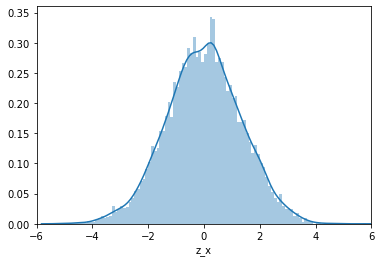

In [1342]:
# Z-score distribution for trait_a
sns.distplot(traits['z_x'],bins=np.array(range(-100,100))/10)
plt.xlim(-6,6);

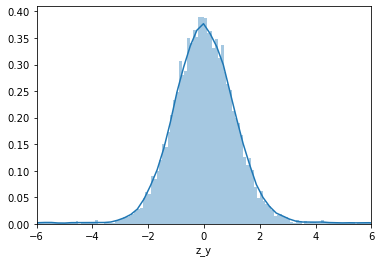

In [1343]:
# Z-score distribution for trait_b
sns.distplot(traits['z_y'],bins =np.array(range(-100,100))/10)
plt.xlim(-6,6);

In [1344]:
# Creating p-values from z-scores
traits['p_x'] = stats.norm.sf(abs(traits['z_x']))*2
traits['p_y'] = stats.norm.sf(abs(traits['z_y']))*2

<ipython-input-1344-52eb4523e459>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits['p_x'] = stats.norm.sf(abs(traits['z_x']))*2
<ipython-input-1344-52eb4523e459>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traits['p_y'] = stats.norm.sf(abs(traits['z_y']))*2


In [1345]:
p_scores_x = traits['p_x'].sort_values().reset_index()
del p_scores_x['index']
p_scores_y = traits['p_y'].sort_values().reset_index()
del p_scores_y['index']

In [1346]:
null = np.random.uniform(size = len(traits))
null.sort()
null

array([1.50494644e-04, 1.53559602e-04, 2.65253900e-04, ...,
       9.99596397e-01, 9.99654360e-01, 9.99667883e-01])

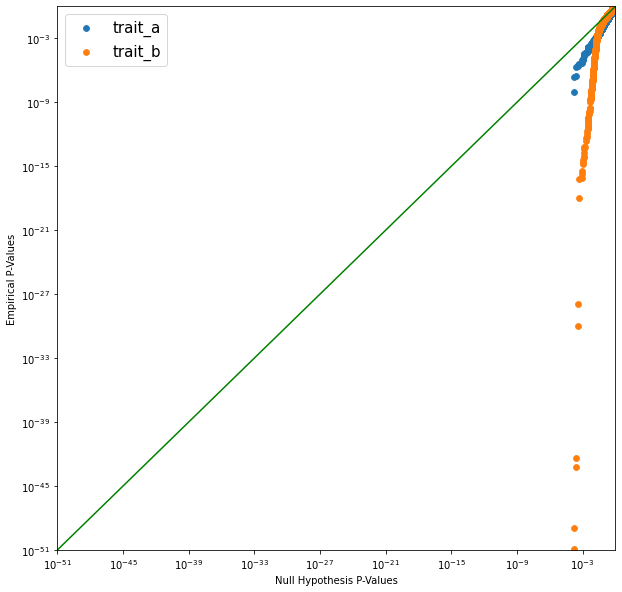

In [1347]:
fig, ax = plt.subplots(figsize = (10,10))
fig1 = sns.scatterplot(null,p_scores_x['p_x'], ax=ax,edgecolor=None,label="trait_a")
fig2 = sns.scatterplot(null,p_scores_y['p_y'], ax=ax,edgecolor=None,label="trait_b")
x = np.linspace(*ax.get_xlim())
plt.ylabel('Empirical P-Values')
plt.xlabel('Null Hypothesis P-Values')
ax.plot(x, x, color = 'green')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(10e-52,1)
plt.ylim(10e-52,1)
ax.legend(prop={'size': 15});

**2.ii**

If the scatter plot comparing the empirical p-values with the null p-values is on the 45-degree line, then that would suggest that we should not reject the null hypothesis. We can think of observations on the 45-degree line as being within the realm of normal random noise, and being off of it is suggestive of a genuine relationship between SNPs and the observed trait.

**2.iii**

Since a QQ plot compares the quantiles of different distributions, one essentially orders both sets of observations from lowest to highest before one plots them on the graph. Since the format of the plot requires observations to be increasing in both dimensions as one goes from left to right, or down to up, the plot will always be monotonically increasing.

**2.iv**

We can see that trait_a has many observations below the green line, providing some evidence that trait_a is somewhat genuinely related to genetic factors. However, there are many values for trait_b that have extremely small p-values relative to the null hypothesis, providing very strong evidence that some SNPs on chromosome 22 are genuinely correlated with trait_b in some way.